This file demonstrates how to use subgroup-rulesets on the Job Corps dataset and replicates the empirical example in [Chiu (2025)](https://arxiv.org/abs/2507.09494).

In [1]:
from subgroup_rulesets.data import load_jobcorps_data, load_jobcorps_rulesets
from subgroup_rulesets import SubgroupRuleset
from subgroup_rulesets.utils import get_stats, create_boxplots, calculate_ruleset_power, find_pareto_optimal_rule_sets
import pandas as pd
import numpy as np
from random import seed
from pprint import pprint
import matplotlib.pyplot as plt
import pickle
import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning)

In [ ]:
# Load the Job Corps data with pre-estimated treatment effects
X_train, X_test, tau_train, tau_test, Y, treat = load_jobcorps_data()

In [3]:
seed(123)
np.random.seed(123)

srs = SubgroupRuleset(X_train,tau_train.to_numpy(),print_message=False)
srs.generate_rules(threshold=0,maxlen=3,N=5000)

In [4]:
all_rulesets = {}

We first try an arbitrary sequence of evenly spaced out values of $\alpha$ to get a sense of which values correspond to which parts of the Pareto front

In [5]:
alphas = np.linspace(0, 1, 11)  # Values of hyperparameter determining tradeoff between group and effect size to try
for alpha in alphas: 
    print(f"Running for alpha={alpha}")
    srs.set_parameters(alpha=alpha, maxcomplex=10)
    all_rulesets[alpha], temp_map_objfn, temp_map_acpt = srs.find_soln(Niteration=250,Nchain=2,fg_switch=.7)

Running for alpha=0.0
Running for alpha=0.1
Running for alpha=0.2
Running for alpha=0.30000000000000004
Running for alpha=0.4
Running for alpha=0.5
Running for alpha=0.6000000000000001
Running for alpha=0.7000000000000001
Running for alpha=0.8
Running for alpha=0.9
Running for alpha=1.0


In [6]:
# Print discovered rules
#pprint(all_rulesets)
# Print subgroup size and effect size
pprint({alpha.tolist(): [get_stats(X_train, tau_train, this_rs)[0].tolist(), get_stats(X_train, tau_train, this_rs)[1].tolist()] for alpha,this_rs in sorted(all_rulesets.items())})

{0.0: [37.16412880700248, 80],
 0.1: [18.46988897000372, 3502],
 0.2: [14.52064604281151, 4960],
 0.30000000000000004: [13.295598704991345, 5362],
 0.4: [12.824498863122086, 5462],
 0.5: [12.54701837607108, 5514],
 0.6000000000000001: [12.54701837607108, 5514],
 0.7000000000000001: [12.54701837607108, 5514],
 0.8: [12.54701837607108, 5514],
 0.9: [12.54701837607108, 5514],
 1.0: [12.54701837607108, 5514]}


Past $\alpha=0.2$, there's no need to try additional values of $\alpha$. There seems like there might be additional Pareto optimal rule sets that values between  0 and 0.2 can identify. Let's first try additional values in [0, 0.1] and then [0.1, 0.2].

In [7]:
for alpha in np.linspace(0.01, 0.09, 9):
    print(f"Running for alpha={alpha}")
    srs.set_parameters(alpha=alpha, maxcomplex=10)
    all_rulesets[alpha], temp_map_objfn, temp_map_acpt = srs.find_soln(Niteration=250,Nchain=2,fg_switch=.7)

Running for alpha=0.01
Running for alpha=0.02
Running for alpha=0.03
Running for alpha=0.04
Running for alpha=0.05
Running for alpha=0.060000000000000005
Running for alpha=0.06999999999999999
Running for alpha=0.08
Running for alpha=0.09


In [8]:
pprint({alpha.tolist(): [get_stats(X_train, tau_train, this_rs)[0].tolist(), get_stats(X_train, tau_train, this_rs)[1].tolist()] for alpha,this_rs in sorted(all_rulesets.items())})

{0.0: [37.16412880700248, 80],
 0.01: [33.78458706794168, 116],
 0.02: [34.28009304510765, 41],
 0.03: [31.12200543566217, 239],
 0.04: [27.880282989189812, 516],
 0.05: [27.36731072027198, 629],
 0.060000000000000005: [18.627866137795614, 3407],
 0.06999999999999999: [18.557440646874085, 3470],
 0.08: [18.557440646874085, 3470],
 0.09: [18.557440646874085, 3470],
 0.1: [18.46988897000372, 3502],
 0.2: [14.52064604281151, 4960],
 0.30000000000000004: [13.295598704991345, 5362],
 0.4: [12.824498863122086, 5462],
 0.5: [12.54701837607108, 5514],
 0.6000000000000001: [12.54701837607108, 5514],
 0.7000000000000001: [12.54701837607108, 5514],
 0.8: [12.54701837607108, 5514],
 0.9: [12.54701837607108, 5514],
 1.0: [12.54701837607108, 5514]}


In [9]:
for alpha in np.linspace(0.041, 0.059, 19):
    print(f"Running for alpha={alpha}")
    srs.set_parameters(alpha=alpha, maxcomplex=10)
    all_rulesets[alpha], temp_map_objfn, temp_map_acpt = srs.find_soln(Niteration=250,Nchain=2,fg_switch=.7)

Running for alpha=0.041
Running for alpha=0.042
Running for alpha=0.043000000000000003
Running for alpha=0.044
Running for alpha=0.045
Running for alpha=0.046
Running for alpha=0.047
Running for alpha=0.048
Running for alpha=0.049
Running for alpha=0.05
Running for alpha=0.051000000000000004
Running for alpha=0.052
Running for alpha=0.053
Running for alpha=0.054
Running for alpha=0.055
Running for alpha=0.056
Running for alpha=0.056999999999999995
Running for alpha=0.057999999999999996
Running for alpha=0.059


In [10]:
pprint({alpha.tolist(): [get_stats(X_train, tau_train, this_rs)[0].tolist(), get_stats(X_train, tau_train, this_rs)[1].tolist()] for alpha,this_rs in sorted(all_rulesets.items())})

{0.0: [37.16412880700248, 80],
 0.01: [33.78458706794168, 116],
 0.02: [34.28009304510765, 41],
 0.03: [31.12200543566217, 239],
 0.04: [27.880282989189812, 516],
 0.041: [28.311123503056525, 495],
 0.042: [30.976648642620315, 251],
 0.043000000000000003: [29.188601501488662, 352],
 0.044: [29.420350453065083, 377],
 0.045: [28.573021502944094, 526],
 0.046: [28.573021502944094, 526],
 0.047: [31.097281962647997, 215],
 0.048: [25.78995392776976, 806],
 0.049: [25.50720759585049, 843],
 0.05: [28.300509350838883, 526],
 0.051000000000000004: [26.105333609188488, 740],
 0.052: [28.983662194497196, 323],
 0.053: [25.78995392776976, 806],
 0.054: [25.78995392776976, 806],
 0.055: [27.095093037143492, 594],
 0.056: [22.674588924959014, 1235],
 0.056999999999999995: [25.50720759585049, 843],
 0.057999999999999996: [20.12944417820988, 2316],
 0.059: [28.300509350838883, 526],
 0.060000000000000005: [18.627866137795614, 3407],
 0.06999999999999999: [18.557440646874085, 3470],
 0.08: [18.55744

In [11]:
for alpha in np.linspace(0.11, 0.19, 9):
    print(f"Running for alpha={alpha}")
    srs.set_parameters(alpha=alpha, maxcomplex=10)
    all_rulesets[alpha], temp_map_objfn, temp_map_acpt = srs.find_soln(Niteration=250,Nchain=2,fg_switch=.7)

Running for alpha=0.11
Running for alpha=0.12
Running for alpha=0.13
Running for alpha=0.14
Running for alpha=0.15
Running for alpha=0.16
Running for alpha=0.16999999999999998
Running for alpha=0.18
Running for alpha=0.19


In [12]:
pprint({alpha.tolist(): [get_stats(X_train, tau_train, this_rs)[0].tolist(), get_stats(X_train, tau_train, this_rs)[1].tolist()] for alpha,this_rs in sorted(all_rulesets.items())})

{0.0: [37.16412880700248, 80],
 0.01: [33.78458706794168, 116],
 0.02: [34.28009304510765, 41],
 0.03: [31.12200543566217, 239],
 0.04: [27.880282989189812, 516],
 0.041: [28.311123503056525, 495],
 0.042: [30.976648642620315, 251],
 0.043000000000000003: [29.188601501488662, 352],
 0.044: [29.420350453065083, 377],
 0.045: [28.573021502944094, 526],
 0.046: [28.573021502944094, 526],
 0.047: [31.097281962647997, 215],
 0.048: [25.78995392776976, 806],
 0.049: [25.50720759585049, 843],
 0.05: [28.300509350838883, 526],
 0.051000000000000004: [26.105333609188488, 740],
 0.052: [28.983662194497196, 323],
 0.053: [25.78995392776976, 806],
 0.054: [25.78995392776976, 806],
 0.055: [27.095093037143492, 594],
 0.056: [22.674588924959014, 1235],
 0.056999999999999995: [25.50720759585049, 843],
 0.057999999999999996: [20.12944417820988, 2316],
 0.059: [28.300509350838883, 526],
 0.060000000000000005: [18.627866137795614, 3407],
 0.06999999999999999: [18.557440646874085, 3470],
 0.08: [18.55744

As you can see, some of the solutions are not Pareto optimal, indicating a lack of convergence in some runs. Let's prune those.

In [13]:
pors = find_pareto_optimal_rule_sets(all_rulesets, X_train, tau_train, get_stats)
#pprint(pors)

There's still a lot of rule sets, and to plot them all would create a lot of clutter and redundancy. We will subset again to just those that are sufficiently spaced out.

In [14]:
# power calculations based on training set
power = calculate_ruleset_power(X_train, np.array(treat[X_train.index]), X_test, pors, [get_stats(X_train, tau_train, this_rs)[0] for this_rs in pors.values()], Y_train=Y[X_train.index])
power

,ruleset,n1_train,n0_train,n1_test_projected,n0_test_projected,coverage_rate_train,treatment_rate_in_covered,estimated_effect,power
0,0.000,50,30,21,12,0.014509,0.625000,37.164129,0.093558
1,0.100,2088,1414,877,593,0.635111,0.596231,18.469889,0.594425
2,0.200,3022,1938,1269,814,0.899528,0.609274,14.520646,0.536148
3,0.300,3246,2116,1363,888,0.972434,0.605371,13.295599,0.497737
4,0.400,3305,2157,1388,905,0.990569,0.605090,12.824499,0.477163
5,0.500,3340,2174,1402,913,1.000000,0.605731,12.547018,0.464269
6,0.010,72,44,30,18,0.021037,0.620690,33.784587,0.105784
7,0.030,150,89,63,37,0.043344,0.627615,31.122005,0.155210
8,0.060,2026,1381,850,580,0.617882,0.594658,18.627866,0.590396
9,0.070,2064,1406,866,590,0.629307,0.594813,18.557441,0.594775


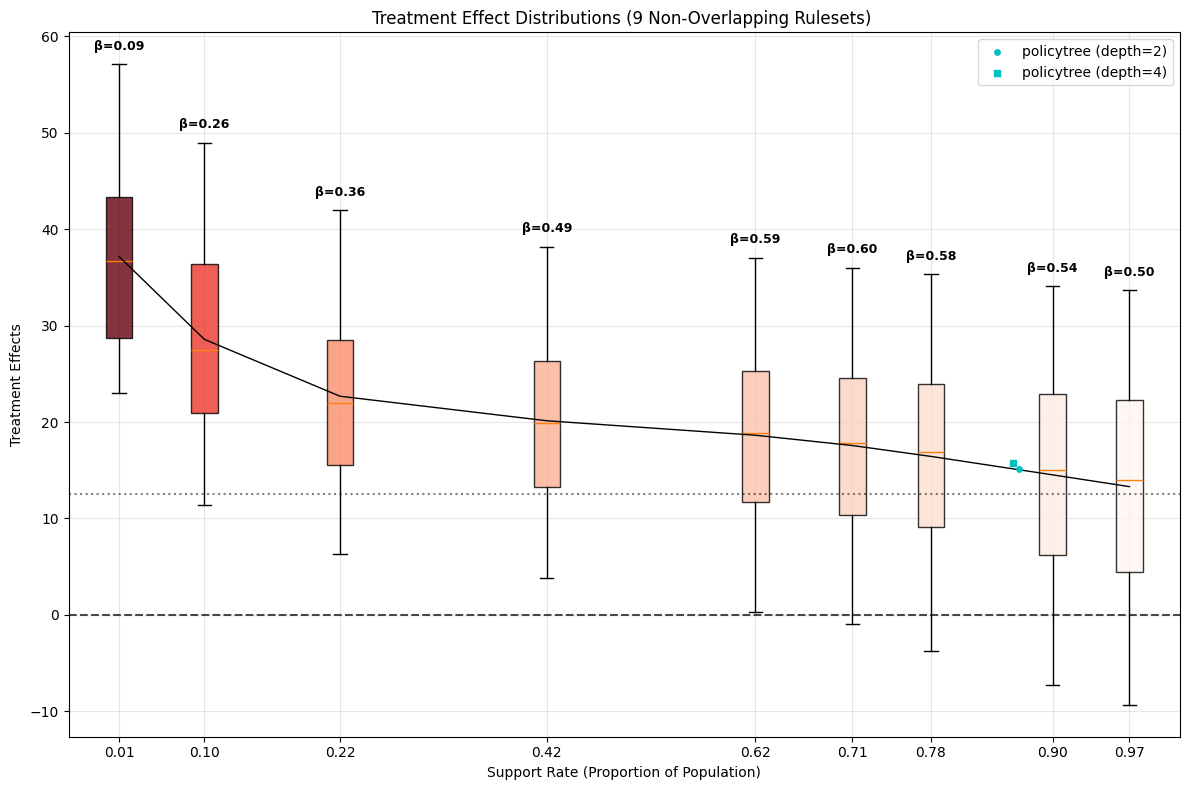

In [15]:

box_width = 0.025
min_gap = 0

selected_rs, boxplot_data, positions, powers, names, avg_effects, quantiles, scale, support_figures, line, show_power = create_boxplots(
    X_train, np.array(treat[X_train.index]), pors, 
    tau=tau_train,  # Provide treatment effects
    power_df=power,
    min_distance_y=1,
    box_width=0.04,
    min_gap=0.02,
    show_power="labels",
    line=True
)
# Create enhanced plot
fig, ax = plt.subplots(figsize=(12, 8))

if len(boxplot_data) > 0:
    # Custom quantile calculation for boxplot
    def custom_boxplot_stats(data, quantiles):
        """Calculate custom boxplot statistics"""
        stats = []
        for dataset in data:
            if len(dataset) > 0:
                q_vals = np.percentile(dataset, [q*100 for q in quantiles])
                stat = {
                    'whislo': q_vals[0],  # Lower whisker
                    'q1': q_vals[1],      # Lower box
                    'med': q_vals[2],     # Median
                    'q3': q_vals[3],      # Upper box
                    'whishi': q_vals[4],  # Upper whisker
                    'fliers': []          # No outliers
                }
            else:
                stat = {'whislo': 0, 'q1': 0, 'med': 0, 'q3': 0, 'whishi': 0, 'fliers': []}
            stats.append(stat)
        return stats
    
    # Create boxplot with custom quantiles
    custom_stats = custom_boxplot_stats(boxplot_data, quantiles)
    bp = ax.bxp(custom_stats, positions=positions, widths=box_width, 
                patch_artist=True, showfliers=False)
    
    # Color by effect size
    if len(avg_effects) > 0:
        norm_effects = (np.array(avg_effects) - min(avg_effects)) / (max(avg_effects) - min(avg_effects))
        colors = plt.cm.Reds(norm_effects)
    else:
        colors = ['blue'] * len(boxplot_data)
    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)
    
    # uniform coloring
    if False:
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')  # Single color for all boxes
            patch.set_alpha(0.25)
    
    
    # Add connecting line if requested
    if line:
        ax.plot(positions, avg_effects, 'k-', alpha=1, linewidth=1, zorder=10)
    
    # Set X-axis range to min/max of plotted support
    if len(positions) > 0:
        x_margin = (max(positions) - min(positions)) * 0.05  # 5% margin
        ax.set_xlim(min(positions) - x_margin, max(positions) + x_margin)
    
    # Format X-axis ticks with custom precision
    ax.set_xticks(positions)
    tick_format = f"{{:.{support_figures}f}}"
    ax.set_xticklabels([tick_format.format(p) for p in positions])
    
    ax.set_xlabel('Support Rate (Proportion of Population)')
    
    # Y-axis label depends on scaling
    if scale == "sd":
        ax.set_ylabel('Treatment Effects (Standard Deviations)')
        title_suffix = "(Standardized)"
    else:
        ax.set_ylabel('Treatment Effects')
        title_suffix = ""
    
    ax.set_title(f'Treatment Effect Distributions ({len(boxplot_data)} Non-Overlapping Rulesets) {title_suffix}')
    ax.grid(True, alpha=0.3)

if show_power == "labels" and powers is not None:
    for i, (pos, power_val) in enumerate(zip(positions, powers)):
        if not np.isnan(power_val):
            y_top = custom_stats[i]['whishi']
            # Add small offset (e.g., 5% of the data range)
            y_range = max(avg_effects) - min(avg_effects)
            offset = y_range * 0.05
            ax.text(pos, y_top + offset, f'\u03B2={power_val:.2f}', 
                   ha='center', va='bottom', fontsize=9, weight='bold')

plt.axhline(y=0, color='black', linestyle='--', alpha=.7)
plt.axhline(y=np.mean(tau_train), color='black', linestyle=':', alpha=.5)

# Estimates from policytree (R package) previously computed
plt.scatter(0.8676604, 15.10346, color='c', marker='o', s=15, label='policytree (depth=2)', zorder=20)
plt.scatter(0.8616615, 15.74166, color='c', marker='s', s=15, label='policytree (depth=4)', zorder=20)

plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# check rulesets we pplotted
[pprint([x,all_rulesets[x]]) for x in selected_rs]

[np.float64(0.0), [['RACE_WHITE', 'AGE_L17', 'CURRJOB_1']]]
[np.float64(0.045),
 [['GOT_ANYW_1', 'RACE_WHITE', 'AGE_L20_neg'],
  ['AGE_L17', 'RACE_WHITE', 'EVJAIL2_1_neg'],
  ['CURRJOB_1', 'AGE_L17', 'EVARRST1_1']]]
[np.float64(0.056),
 [['AGE_L20_neg', 'RACE_HISP_neg', 'GOT_ANYW_1'],
  ['GOT_ANYW_1', 'GUILTY2_1', 'CURRJOB_1'],
  ['NTV_ENG', 'AGE_L17', 'RACE_BLACK_neg']]]
[np.float64(0.057999999999999996),
 [['AGE_L18', 'INC_L6', 'YR_WORK1_1'],
  ['GOT_ANYW_1', 'RACE_HISP_neg', 'AGE_L20_neg'],
  ['RACE_WHITE', 'INC_L6', 'AGE_L20_neg']]]
[np.float64(0.060000000000000005),
 [['AGE_L20_neg', 'RACE_HISP_neg', 'GOT_ANYW_1'],
  ['INC_L6', 'MARRIED_1', 'AGE_L18'],
  ['RACE_WHITE', 'INC_L6', 'AGE_L20_neg']]]
[np.float64(0.15),
 [['AGE_L20_neg', 'RACE_HISP_neg', 'GOT_ANYW_1'],
  ['AGE_L18'],
  ['AGE_L20_neg', 'INC_L6', 'NTV_ENG'],
  ['NTV_SP', 'INC_L6', 'AGE_L20']]]
[np.float64(0.16999999999999998),
 [['AGE_L18', 'INC_L6'],
  ['AGE_L20_neg', 'GOT_ANYW_1', 'RACE_HISP_neg'],
  ['INC_L6', 'RACE_BL

[None, None, None, None, None, None, None, None, None]

In [17]:
# save the rulesets
with open("../subgroup_rulesets/data/jobcorps_rs.pkl", 'wb') as file:
    pickle.dump(all_rulesets, file)